In [79]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import os
import torch
from torch import nn
from torch import nn, optim

import torch.nn.functional as F

%matplotlib inline

In [57]:
%store -r l

In [410]:
%store -r l_comb

In [538]:
df_new = np.asarray(df_new ) 

In [541]:
l_comb.shape
x = l_comb
x = np.concatenate([df_new,x], axis=1)

In [542]:
x

array([[0.6       , 0.375     , 0.22580645, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.3125    , 0.2133995 , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.4375    , 0.17866005, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.4375    , 0.33995037, ..., 0.        , 0.        ,
        0.        ],
       [0.7       , 0.5625    , 0.49627792, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.3125    , 0.18610422, ..., 0.        , 0.        ,
        0.        ]])

In [546]:
x.shape

(14784, 535)

In [5]:
%store -r Epi_result

In [413]:
lables = np.array(Epi_result['label']).reshape((-1,1))
lables.shape

(14784, 1)

In [414]:
import numpy as np

In [544]:
x = np.append(x, lables, axis=1) 
 

In [762]:
x_1.reshape((-1,1))

AttributeError: 'tuple' object has no attribute 'reshape'

In [872]:
sum(x[:,-1] ==1)
sum(x[:,-1]==1)
id_new = np.argwhere(x[:,-1] == 1)

In [881]:
id_new_neg = np.argwhere(x[:,-1] == 0)
id_new_neg = id_new_neg[:1344]

In [876]:
x_1 = np.squeeze(x_1) 

In [874]:
x_1 = x[id_new] 


In [884]:
x_2 = x[id_new_neg] 
x_2 = np.squeeze(x_2) 

In [773]:
x_1 = x.copy()
id_new = (x_1[:,-1]==1)

In [888]:
x_1.shape, x_2.shape
x = np.concatenate([x_1, x_2])

In [890]:
x.shape

(2688, 535)

In [891]:
indices = np.random.RandomState(seed=43).permutation(x.shape[0]) 
 

In [781]:
x_1[:,-1]

array([1., 1., 1., ..., 1., 1., 1.])

In [819]:
test_idx =indices 

In [820]:
test_idx.shape

(14784,)

In [821]:
X_test = x[test_idx,:529]
Y_test = x[test_idx,534] 

In [893]:
test_idx 

array([1372, 1016,  215, ..., 2325, 2303, 1860])

In [894]:
#training_idx, test_idx = indices[:12000], indices[12000:]
training_idx, test_idx = indices[:2400], indices[2400:]
#training_idx, test_idx = indices[:1200], indices[1200:]

In [895]:
#for combined features and solo features and with distances as features

#X_train, X_test = x[training_idx,:288], x[test_idx,:288]
#X_train, X_test = x[training_idx,:529], x[test_idx,:529]
X_train, X_test = x[training_idx,:529], x[test_idx,:529]
#X_train, X_test = x[training_idx,:534], x[test_idx,:534]
#X_train_CNN, X_test_CNN = x[training_idx,:528], x[test_idx,:528]

In [896]:
#Y_train, Y_test = x[training_idx,528] , x[test_idx,528] 
Y_train, Y_test = x[training_idx,534] , x[test_idx,534] 
#Y_train, Y_test = x_1[training_idx,534] , x_1[test_idx,534] 

In [897]:
Y_train.shape, X_train.shape, X_test.shape,Y_test.shape

 

((2400,), (2400, 529), (288, 529), (288,))

In [173]:
X_train[0:4, 0:288].shape

(4, 288)

In [579]:
X_train.shape

(12000, 528)

In [843]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [925]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_features):
        super(NeuralNetwork, self).__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_features, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        
        return torch.sigmoid(logits)

In [926]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)

In [927]:
output = m(input)
output

tensor([[0.1241, 0.0104, 0.8656],
        [0.7581, 0.1437, 0.0982]])

In [928]:
model = NeuralNetwork(X_train.shape[1]).to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=529, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [929]:
#sample example for model 
X = torch.rand(120, 529, device=device)

pred_probab = model(X.float())
y_pred = pred_probab.argmax(0)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([53], device='cuda:0')


In [930]:
y_pred 

tensor([53], device='cuda:0')

In [931]:
criterion = nn.BCELoss().to(device)

In [932]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [933]:
device

'cuda'

In [938]:
 

X_train = torch.tensor(X_train).view(-1,23,23).to(device)
#X_train = torch.tensor(X_train).to(device)
Y_train = torch.tensor(Y_train).to(device)
#X_test = torch.tensor(X_test).view(-1,23,23).to(device)
X_test = torch.tensor(X_test).to(device)
Y_test = torch.tensor(Y_test).to(device)

 

/s/chopin/d/proj/ramfis-aida/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/s/chopin/d/proj/ramfis-aida/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/s/chopin/d/proj/ramfis-aida/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/s/chopin/d/p

In [395]:
pred_probab = model(X_train.float())

In [855]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return ((y_true == predicted).sum().float() / len(y_true), (y_true == predicted).sum())

In [346]:
calculate_accuracy(torch.tensor(0.3), torch.tensor(1))

TypeError: len() of a 0-d tensor

In [856]:
def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)


In [857]:
test_losses = []
train_losses = []
test_accur = []
train_accur = []
for epoch in range(10000):

    y_pred = model(X_train.float())

    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, Y_train.float())

    if epoch % 100 == 0:
        train_acc,_ = calculate_accuracy(Y_train, y_pred)

        y_test_pred = model(X_test.float())
        y_test_pred = torch.squeeze(y_test_pred)
         

        test_loss = criterion(y_test_pred, Y_test.float())

        test_acc, total_corr = calculate_accuracy(Y_test, y_test_pred)
        print(total_corr)
        
        print(f'''epoch {epoch}Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        test_accur.append(test_acc)
        train_accur.append(train_acc)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()
    
    

tensor(617, device='cuda:0')
epoch 0Train set - loss: 0.705, accuracy: 0.228Test  set - loss: 0.705, accuracy: 0.222

tensor(2527, device='cuda:0')
epoch 100Train set - loss: 0.476, accuracy: 0.909Test  set - loss: 0.476, accuracy: 0.908

tensor(2527, device='cuda:0')
epoch 200Train set - loss: 0.327, accuracy: 0.909Test  set - loss: 0.328, accuracy: 0.908

tensor(2527, device='cuda:0')
epoch 300Train set - loss: 0.308, accuracy: 0.909Test  set - loss: 0.311, accuracy: 0.908

tensor(2527, device='cuda:0')
epoch 400Train set - loss: 0.304, accuracy: 0.909Test  set - loss: 0.308, accuracy: 0.908

tensor(2527, device='cuda:0')
epoch 500Train set - loss: 0.3, accuracy: 0.909Test  set - loss: 0.306, accuracy: 0.908

tensor(2527, device='cuda:0')
epoch 600Train set - loss: 0.295, accuracy: 0.909Test  set - loss: 0.303, accuracy: 0.908

tensor(2527, device='cuda:0')
epoch 700Train set - loss: 0.29, accuracy: 0.909Test  set - loss: 0.298, accuracy: 0.908

tensor(2527, device='cuda:0')
epoch 80

tensor(2766, device='cuda:0')
epoch 6900Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.022, accuracy: 0.994

tensor(2766, device='cuda:0')
epoch 7000Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.022, accuracy: 0.994

tensor(2766, device='cuda:0')
epoch 7100Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.022, accuracy: 0.994

tensor(2766, device='cuda:0')
epoch 7200Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.022, accuracy: 0.994

tensor(2766, device='cuda:0')
epoch 7300Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.022, accuracy: 0.994

tensor(2766, device='cuda:0')
epoch 7400Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.022, accuracy: 0.994

tensor(2767, device='cuda:0')
epoch 7500Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.022, accuracy: 0.994

tensor(2767, device='cuda:0')
epoch 7600Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.022, accuracy: 0.994

tensor(2767, device='cuda:0')
epoch 7700Train set - loss

# Loss and Accuracies Plots vs Epochs with phonetic vectors as features 90/10 (neg/pos) samples

Text(0, 0.5, 'loss')

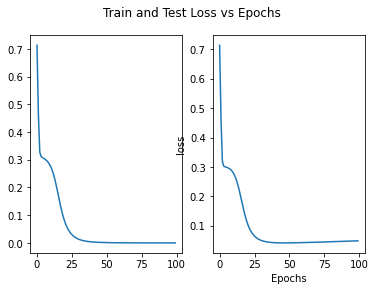

In [505]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(train_losses)
ax2.plot(test_losses)
fig.suptitle('Train and Test Loss vs Epochs')
#fig.suptitle('TestLoss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracies')

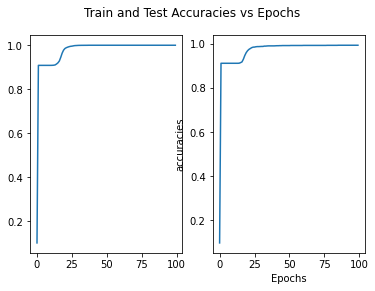

In [518]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(train_accur)
ax2.plot(test_accur)
fig.suptitle('Train and Test Accuracies vs Epochs')
#fig.suptitle('TestLoss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracies')

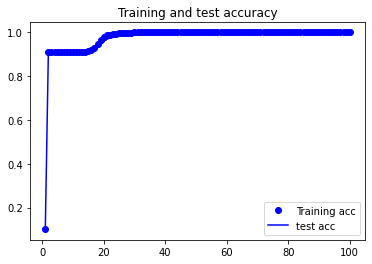

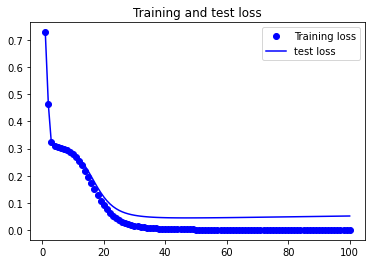

In [519]:
epochs = range(1, len(test_accur) + 1)

plt.plot(epochs, train_accur, 'bo', label='Training acc')
plt.plot(epochs, test_accur, 'b', label='test acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, test_losses, 'b', label='test loss')
plt.title('Training and test loss')
plt.legend()

plt.show()

# Loss and Accuracies Plots vs Epochs with Edit distances as features 90/10 (neg/pos)samples

Text(0, 0.5, 'accuracies')

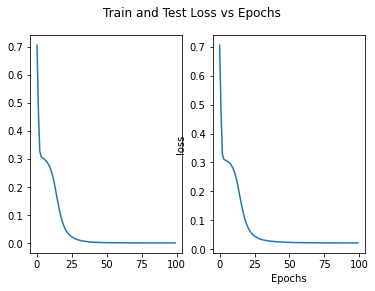

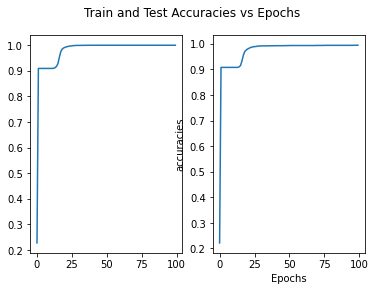

In [858]:
#plots of accuracies and losses with edit distances as features
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(train_losses)
ax2.plot(test_losses)
fig.suptitle('Train and Test Loss vs Epochs')
#fig.suptitle('TestLoss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')


fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(train_accur)
ax2.plot(test_accur)
fig.suptitle('Train and Test Accuracies vs Epochs')
#fig.suptitle('TestLoss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracies')



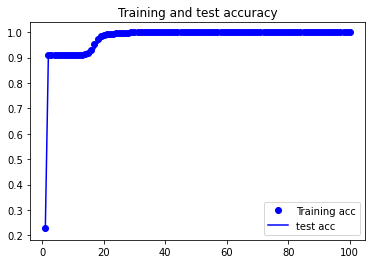

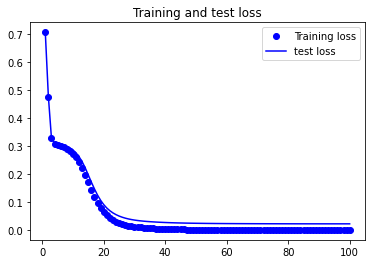

In [859]:
epochs = range(1, len(test_accur) + 1)

plt.plot(epochs, train_accur, 'bo', label='Training acc')
plt.plot(epochs, test_accur, 'b', label='test acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, test_losses, 'b', label='test loss')
plt.title('Training and test loss')
plt.legend()

plt.show()

# Loss and Accuracies Plots vs Epochs with Edit distances as features balanced  50/50 (neg/pos)samples

In [935]:
test_losses = []
train_losses = []
test_accur = []
train_accur = []
for epoch in range(10000):

    y_pred = model(X_train.float())

    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, Y_train.float())

    if epoch % 100 == 0:
        train_acc,_ = calculate_accuracy(Y_train, y_pred)

        y_test_pred = model(X_test.float())
        y_test_pred = torch.squeeze(y_test_pred)
         

        test_loss = criterion(y_test_pred, Y_test.float())

        test_acc, total_corr = calculate_accuracy(Y_test, y_test_pred)
        print(total_corr)
        
        print(f'''epoch {epoch}Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        test_accur.append(test_acc)
        train_accur.append(train_acc)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()
    
    

tensor(149, device='cuda:0')
epoch 0Train set - loss: 0.692, accuracy: 0.545Test  set - loss: 0.693, accuracy: 0.517

tensor(193, device='cuda:0')
epoch 100Train set - loss: 0.67, accuracy: 0.771Test  set - loss: 0.68, accuracy: 0.67

tensor(221, device='cuda:0')
epoch 200Train set - loss: 0.629, accuracy: 0.863Test  set - loss: 0.651, accuracy: 0.767

tensor(238, device='cuda:0')
epoch 300Train set - loss: 0.555, accuracy: 0.915Test  set - loss: 0.594, accuracy: 0.826

tensor(256, device='cuda:0')
epoch 400Train set - loss: 0.449, accuracy: 0.954Test  set - loss: 0.509, accuracy: 0.889

tensor(260, device='cuda:0')
epoch 500Train set - loss: 0.341, accuracy: 0.974Test  set - loss: 0.418, accuracy: 0.903

tensor(265, device='cuda:0')
epoch 600Train set - loss: 0.252, accuracy: 0.982Test  set - loss: 0.342, accuracy: 0.92

tensor(266, device='cuda:0')
epoch 700Train set - loss: 0.186, accuracy: 0.987Test  set - loss: 0.285, accuracy: 0.924

tensor(268, device='cuda:0')
epoch 800Train se

tensor(280, device='cuda:0')
epoch 7200Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.127, accuracy: 0.972

tensor(280, device='cuda:0')
epoch 7300Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.127, accuracy: 0.972

tensor(280, device='cuda:0')
epoch 7400Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.128, accuracy: 0.972

tensor(280, device='cuda:0')
epoch 7500Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.128, accuracy: 0.972

tensor(280, device='cuda:0')
epoch 7600Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.128, accuracy: 0.972

tensor(280, device='cuda:0')
epoch 7700Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.128, accuracy: 0.972

tensor(280, device='cuda:0')
epoch 7800Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.129, accuracy: 0.972

tensor(280, device='cuda:0')
epoch 7900Train set - loss: 0.0, accuracy: 1.0Test  set - loss: 0.129, accuracy: 0.972

tensor(280, device='cuda:0')
epoch 8000Train set - loss: 0.0, ac

Text(0, 0.5, 'accuracies')

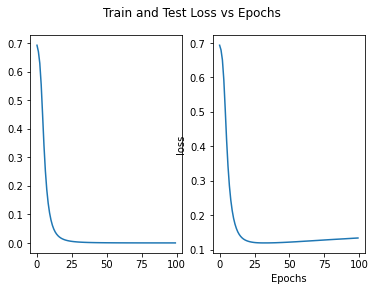

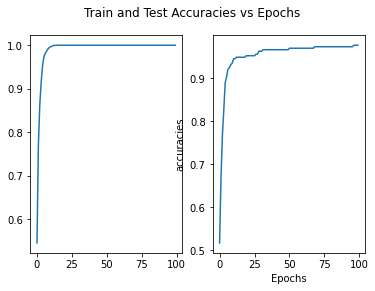

In [936]:
 #plots of accuracies and losses with edit distances as features
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(train_losses)
ax2.plot(test_losses)
fig.suptitle('Train and Test Loss vs Epochs')
#fig.suptitle('TestLoss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')


fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(train_accur)
ax2.plot(test_accur)
fig.suptitle('Train and Test Accuracies vs Epochs')
#fig.suptitle('TestLoss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracies')

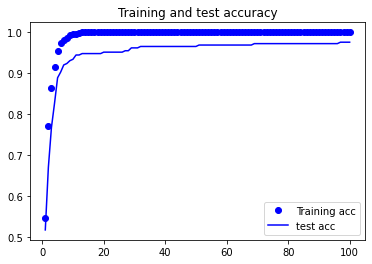

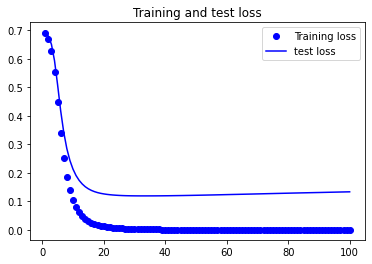

In [937]:
epochs = range(1, len(test_accur) + 1)

plt.plot(epochs, train_accur, 'bo', label='Training acc')
plt.plot(epochs, test_accur, 'b', label='test acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, test_losses, 'b', label='test loss')
plt.title('Training and test loss')
plt.legend()

plt.show()

In [520]:
Epi_result

,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen,label,features_loan
0,तसल्ली,بغاوت,təslliː,bɣɒvt,6,7,2.020833,2.291667,19.1250,1.000000,0,"[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, 1, ..."
1,ख़राश,طرفدار,xəraːʃ,trfdɒr,5,6,1.916667,2.333333,16.5625,1.000000,0,"[-1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, -1, ..."
2,चिराग़,نقاب,t͡ʃiraːɣ,nɣɒb,4,8,1.625000,1.833333,13.5625,1.000000,0,"[-1, -1, 1, -1, 1, -1, -1, 0, -1, -1, -1, -1, ..."
3,मरहम,شوهر,mərɦəm,ʃvhr,4,6,2.625000,3.083333,21.2500,1.000000,0,"[-1, 1, 1, -1, -1, -1, 1, 0, 1, -1, -1, 1, -1,..."
4,हैवानियत,خُوشنَوِیسی,ɦæːvaːnijət,xُvʃnowejsj,5,10,2.833333,3.125000,25.7500,0.909091,0,"[-1, 1, 1, 1, -1, -1, -1, 0, 1, -1, -1, -1, -1..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14779,तहसील,تحصیل,təɦsiːl,thsjl,2,4,1.062500,1.208333,8.8125,0.571429,1,"[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, 1, ..."
14780,तीर,برفی,tiːr,brfj,3,4,1.562500,1.916667,13.2500,1.000000,0,"[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, 1, ..."
14781,सितारा,قید,sitaːraː,ɣjd,5,8,2.979167,3.416667,24.2500,1.000000,0,"[-1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, 1, 1..."
14782,सबूत,کبابه چینی,səbuːt,kbɒbh t͡ʃjnj,7,10,4.291667,4.750000,34.3750,0.833333,0,"[-1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, 1, 1..."


In [521]:
edit_dists_names = ["fast levenshtein", "Dolgo prime distance", \
                    "Feature edit distance", "Hamming feature distance", "Weighted feature distance", \
                    "Fast Levenshtein distance div maxlen"]

In [522]:
df_new = Epi_result[edit_dists_names]

In [523]:
df_new

,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen
0,6,7,2.020833,2.291667,19.1250,1.000000
1,5,6,1.916667,2.333333,16.5625,1.000000
2,4,8,1.625000,1.833333,13.5625,1.000000
3,4,6,2.625000,3.083333,21.2500,1.000000
4,5,10,2.833333,3.125000,25.7500,0.909091
...,...,...,...,...,...,...
14779,2,4,1.062500,1.208333,8.8125,0.571429
14780,3,4,1.562500,1.916667,13.2500,1.000000
14781,5,8,2.979167,3.416667,24.2500,1.000000
14782,7,10,4.291667,4.750000,34.3750,0.833333


In [524]:
from sklearn import preprocessing

In [525]:
x_new = df_new #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_new)
df_new = pd.DataFrame(x_scaled)

In [526]:
df_new

,0,1,2,3,4,5
0,0.6,0.3750,0.225806,0.233184,0.274838,1.000000
1,0.5,0.3125,0.213400,0.237668,0.236769,1.000000
2,0.4,0.4375,0.178660,0.183857,0.192201,1.000000
3,0.4,0.3125,0.297767,0.318386,0.306407,1.000000
4,0.5,0.5625,0.322581,0.322870,0.373259,0.886364
...,...,...,...,...,...,...
14779,0.2,0.1875,0.111663,0.116592,0.121634,0.464286
14780,0.3,0.1875,0.171216,0.192825,0.187558,1.000000
14781,0.5,0.4375,0.339950,0.354260,0.350975,1.000000
14782,0.7,0.5625,0.496278,0.497758,0.501393,0.791667


# Trying a CNN as a classifier on phonetic features with edit distance features 


In [566]:
class Net_CNN(nn.Module):   
    def __init__(self):
        super(Net_CNN, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 1)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [967]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 2) # input is 1 image, 32 output channels, 2X2 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 2) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128,2)
        

        x = torch.randn(23,23).view(-1,1,23,23)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 1) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.tanh(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.tanh(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.tanh(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.tanh(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.sigmoid(x)
                         


net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
)


In [968]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
#loss_function = nn.MSELoss()
loss_function = nn.BCELoss().to(device)

In [969]:
from tqdm import tqdm

# experimenting with a dataset with 90/10 negative/positive samples 

In [868]:
loss_cnn_train = []
EPOCHS = 100
BATCH_SIZE = 120
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(X_train), BATCH_SIZE)):
        batch_X = X_train[i:i+BATCH_SIZE].view(-1, 1, 23, 23)
        batch_y = Y_train[i:i+BATCH_SIZE]
        
    
        net.zero_grad()
        outputs = net(batch_X.float())
        #print(outputs)
        loss = loss_function(outputs,  batch_y.float().reshape((-1,1)))
        
        loss.backward()
        optimizer.step()
    loss_cnn_train.append(loss)
    if EPOCHS % 10 == 0:
        print(f"Epoch: {epoch}. Loss: {loss}")



100%|██████████| 100/100 [00:00<00:00, 559.98it/s]


Epoch: 0. Loss: 0.2514965236186981


100%|██████████| 100/100 [00:00<00:00, 569.47it/s]


Epoch: 1. Loss: 0.06250132620334625


100%|██████████| 100/100 [00:00<00:00, 566.87it/s]


Epoch: 2. Loss: 0.027737129479646683


100%|██████████| 100/100 [00:00<00:00, 567.29it/s]


Epoch: 3. Loss: 0.011346767656505108


100%|██████████| 100/100 [00:00<00:00, 567.10it/s]


Epoch: 4. Loss: 0.005810735747218132


100%|██████████| 100/100 [00:00<00:00, 566.37it/s]


Epoch: 5. Loss: 0.003792903618887067


100%|██████████| 100/100 [00:00<00:00, 566.70it/s]


Epoch: 6. Loss: 0.017999187111854553


100%|██████████| 100/100 [00:00<00:00, 568.50it/s]


Epoch: 7. Loss: 0.00960737094283104


100%|██████████| 100/100 [00:00<00:00, 568.08it/s]


Epoch: 8. Loss: 0.005525154061615467


100%|██████████| 100/100 [00:00<00:00, 567.98it/s]


Epoch: 9. Loss: 0.0007998829241842031


100%|██████████| 100/100 [00:00<00:00, 568.28it/s]


Epoch: 10. Loss: 0.001964234746992588


100%|██████████| 100/100 [00:00<00:00, 566.98it/s]


Epoch: 11. Loss: 0.07693301141262054


100%|██████████| 100/100 [00:00<00:00, 567.74it/s]


Epoch: 12. Loss: 0.015193312428891659


100%|██████████| 100/100 [00:00<00:00, 566.45it/s]


Epoch: 13. Loss: 0.009238814935088158


100%|██████████| 100/100 [00:00<00:00, 567.67it/s]


Epoch: 14. Loss: 0.00022537217591889203


100%|██████████| 100/100 [00:00<00:00, 569.64it/s]


Epoch: 15. Loss: 0.00046802774886600673


100%|██████████| 100/100 [00:00<00:00, 569.26it/s]


Epoch: 16. Loss: 8.579908171668649e-05


100%|██████████| 100/100 [00:00<00:00, 569.42it/s]


Epoch: 17. Loss: 2.9564189389930107e-05


100%|██████████| 100/100 [00:00<00:00, 569.49it/s]


Epoch: 18. Loss: 2.7396234145271592e-05


100%|██████████| 100/100 [00:00<00:00, 570.55it/s]


Epoch: 19. Loss: 2.4079125068965368e-05


100%|██████████| 100/100 [00:00<00:00, 566.57it/s]


Epoch: 20. Loss: 2.1036574253230356e-05


100%|██████████| 100/100 [00:00<00:00, 568.44it/s]


Epoch: 21. Loss: 1.844853613874875e-05


100%|██████████| 100/100 [00:00<00:00, 568.33it/s]


Epoch: 22. Loss: 1.6297421097988263e-05


100%|██████████| 100/100 [00:00<00:00, 568.19it/s]


Epoch: 23. Loss: 1.4537969036609866e-05


100%|██████████| 100/100 [00:00<00:00, 565.84it/s]


Epoch: 24. Loss: 1.3093604138703085e-05


100%|██████████| 100/100 [00:00<00:00, 568.17it/s]


Epoch: 25. Loss: 1.185149358207127e-05


100%|██████████| 100/100 [00:00<00:00, 568.63it/s]


Epoch: 26. Loss: 1.0800203199323732e-05


100%|██████████| 100/100 [00:00<00:00, 568.68it/s]


Epoch: 27. Loss: 9.842332474363502e-06


100%|██████████| 100/100 [00:00<00:00, 567.95it/s]


Epoch: 28. Loss: 9.031043191498611e-06


100%|██████████| 100/100 [00:00<00:00, 566.95it/s]


Epoch: 29. Loss: 8.312166755786166e-06


100%|██████████| 100/100 [00:00<00:00, 565.75it/s]


Epoch: 30. Loss: 7.649445251445286e-06


100%|██████████| 100/100 [00:00<00:00, 568.32it/s]


Epoch: 31. Loss: 7.073668712109793e-06


100%|██████████| 100/100 [00:00<00:00, 567.88it/s]


Epoch: 32. Loss: 6.552544618898537e-06


100%|██████████| 100/100 [00:00<00:00, 569.70it/s]


Epoch: 33. Loss: 6.068186849006452e-06


100%|██████████| 100/100 [00:00<00:00, 569.66it/s]


Epoch: 34. Loss: 5.6454341574863065e-06


100%|██████████| 100/100 [00:00<00:00, 569.70it/s]


Epoch: 35. Loss: 5.253484232525807e-06


100%|██████████| 100/100 [00:00<00:00, 569.47it/s]


Epoch: 36. Loss: 4.905252353637479e-06


100%|██████████| 100/100 [00:00<00:00, 569.87it/s]


Epoch: 37. Loss: 4.572423677018378e-06


100%|██████████| 100/100 [00:00<00:00, 569.58it/s]


Epoch: 38. Loss: 4.264930794306565e-06


100%|██████████| 100/100 [00:00<00:00, 567.55it/s]


Epoch: 39. Loss: 3.995194219896803e-06


100%|██████████| 100/100 [00:00<00:00, 567.86it/s]


Epoch: 40. Loss: 3.7348963815020397e-06


100%|██████████| 100/100 [00:00<00:00, 568.58it/s]


Epoch: 41. Loss: 3.4999345643882407e-06


100%|██████████| 100/100 [00:00<00:00, 567.57it/s]


Epoch: 42. Loss: 3.284844524387154e-06


100%|██████████| 100/100 [00:00<00:00, 567.87it/s]


Epoch: 43. Loss: 3.0737285214854637e-06


100%|██████████| 100/100 [00:00<00:00, 568.32it/s]


Epoch: 44. Loss: 2.884469722630456e-06


100%|██████████| 100/100 [00:00<00:00, 568.49it/s]


Epoch: 45. Loss: 2.715082473514485e-06


100%|██████████| 100/100 [00:00<00:00, 566.13it/s]


Epoch: 46. Loss: 2.551656052673934e-06


100%|██████████| 100/100 [00:00<00:00, 566.73it/s]


Epoch: 47. Loss: 2.4016421775741037e-06


100%|██████████| 100/100 [00:00<00:00, 568.82it/s]


Epoch: 48. Loss: 2.2645440367341507e-06


100%|██████████| 100/100 [00:00<00:00, 571.01it/s]


Epoch: 49. Loss: 2.1284390641085338e-06


100%|██████████| 100/100 [00:00<00:00, 568.03it/s]


Epoch: 50. Loss: 2.0012762433907483e-06


100%|██████████| 100/100 [00:00<00:00, 567.40it/s]


Epoch: 51. Loss: 1.8855381540561211e-06


100%|██████████| 100/100 [00:00<00:00, 570.79it/s]


Epoch: 52. Loss: 1.7812255919125164e-06


100%|██████████| 100/100 [00:00<00:00, 569.69it/s]


Epoch: 53. Loss: 1.676416331974906e-06


100%|██████████| 100/100 [00:00<00:00, 570.74it/s]


Epoch: 54. Loss: 1.583528728588135e-06


100%|██████████| 100/100 [00:00<00:00, 570.51it/s]


Epoch: 55. Loss: 1.4871641269564861e-06


100%|██████████| 100/100 [00:00<00:00, 569.49it/s]


Epoch: 56. Loss: 1.408681896464259e-06


100%|██████████| 100/100 [00:00<00:00, 567.98it/s]


Epoch: 57. Loss: 1.3272192518343218e-06


100%|██████████| 100/100 [00:00<00:00, 568.91it/s]


Epoch: 58. Loss: 1.2522143606474856e-06


100%|██████████| 100/100 [00:00<00:00, 567.88it/s]


Epoch: 59. Loss: 1.1831702977360692e-06


100%|██████████| 100/100 [00:00<00:00, 569.12it/s]


Epoch: 60. Loss: 1.117106535275525e-06


100%|██████████| 100/100 [00:00<00:00, 568.45it/s]


Epoch: 61. Loss: 1.0525330935706734e-06


100%|██████████| 100/100 [00:00<00:00, 569.03it/s]


Epoch: 62. Loss: 9.969005532184383e-07


100%|██████████| 100/100 [00:00<00:00, 569.12it/s]


Epoch: 63. Loss: 9.432551451027393e-07


100%|██████████| 100/100 [00:00<00:00, 570.27it/s]


Epoch: 64. Loss: 8.915964713196445e-07


100%|██████████| 100/100 [00:00<00:00, 568.71it/s]


Epoch: 65. Loss: 8.444085324299522e-07


100%|██████████| 100/100 [00:00<00:00, 569.48it/s]


Epoch: 66. Loss: 7.967237252159975e-07


100%|██████████| 100/100 [00:00<00:00, 570.70it/s]


Epoch: 67. Loss: 7.535094823651889e-07


100%|██████████| 100/100 [00:00<00:00, 570.01it/s]


Epoch: 68. Loss: 7.142689923966827e-07


100%|██████████| 100/100 [00:00<00:00, 570.28it/s]


Epoch: 69. Loss: 6.765187094970315e-07


100%|██████████| 100/100 [00:00<00:00, 570.64it/s]


Epoch: 70. Loss: 6.362848239405139e-07


100%|██████████| 100/100 [00:00<00:00, 570.75it/s]


Epoch: 71. Loss: 6.02508350766584e-07


100%|██████████| 100/100 [00:00<00:00, 569.42it/s]


Epoch: 72. Loss: 5.732022714255436e-07


100%|██████████| 100/100 [00:00<00:00, 571.47it/s]


Epoch: 73. Loss: 5.394258550950326e-07


100%|██████████| 100/100 [00:00<00:00, 570.91it/s]


Epoch: 74. Loss: 5.091264370093995e-07


100%|██████████| 100/100 [00:00<00:00, 568.88it/s]


Epoch: 75. Loss: 4.828006581192312e-07


100%|██████████| 100/100 [00:00<00:00, 569.42it/s]


Epoch: 76. Loss: 4.579651147196273e-07


100%|██████████| 100/100 [00:00<00:00, 569.33it/s]


Epoch: 77. Loss: 4.326329019477271e-07


100%|██████████| 100/100 [00:00<00:00, 565.57it/s]


Epoch: 78. Loss: 4.0978417814585555e-07


100%|██████████| 100/100 [00:00<00:00, 569.92it/s]


Epoch: 79. Loss: 3.8792887835370493e-07


100%|██████████| 100/100 [00:00<00:00, 570.36it/s]


Epoch: 80. Loss: 3.660736354049732e-07


100%|██████████| 100/100 [00:00<00:00, 569.84it/s]


Epoch: 81. Loss: 3.4918548408313654e-07


100%|██████████| 100/100 [00:00<00:00, 568.96it/s]


Epoch: 82. Loss: 3.2882039135984087e-07


100%|██████████| 100/100 [00:00<00:00, 570.57it/s]


Epoch: 83. Loss: 3.1292566404772515e-07


100%|██████████| 100/100 [00:00<00:00, 569.69it/s]


Epoch: 84. Loss: 2.9504414555958647e-07


100%|██████████| 100/100 [00:00<00:00, 570.30it/s]


Epoch: 85. Loss: 2.7964617288489535e-07


100%|██████████| 100/100 [00:00<00:00, 568.01it/s]


Epoch: 86. Loss: 2.662350198079366e-07


100%|██████████| 100/100 [00:00<00:00, 571.53it/s]


Epoch: 87. Loss: 2.51830442721257e-07


100%|██████████| 100/100 [00:00<00:00, 571.97it/s]


Epoch: 88. Loss: 2.3792262027200195e-07


100%|██████████| 100/100 [00:00<00:00, 570.35it/s]


Epoch: 89. Loss: 2.2550491962647357e-07


100%|██████████| 100/100 [00:00<00:00, 573.63it/s]


Epoch: 90. Loss: 2.1358393098580564e-07


100%|██████████| 100/100 [00:00<00:00, 573.41it/s]


Epoch: 91. Loss: 2.0116623034027725e-07


100%|██████████| 100/100 [00:00<00:00, 574.01it/s]


Epoch: 92. Loss: 1.9172875909134746e-07


100%|██████████| 100/100 [00:00<00:00, 575.80it/s]


Epoch: 93. Loss: 1.7931107265667379e-07


100%|██████████| 100/100 [00:00<00:00, 575.13it/s]


Epoch: 94. Loss: 1.7086705383917433e-07


100%|██████████| 100/100 [00:00<00:00, 571.99it/s]


Epoch: 95. Loss: 1.6142959680109925e-07


100%|██████████| 100/100 [00:00<00:00, 571.81it/s]


Epoch: 96. Loss: 1.5397897357161128e-07


100%|██████████| 100/100 [00:00<00:00, 571.81it/s]


Epoch: 97. Loss: 1.4503824274925137e-07


100%|██████████| 100/100 [00:00<00:00, 572.57it/s]


Epoch: 98. Loss: 1.3709095014746708e-07


100%|██████████| 100/100 [00:00<00:00, 572.78it/s]

Epoch: 99. Loss: 1.2914362912397337e-07


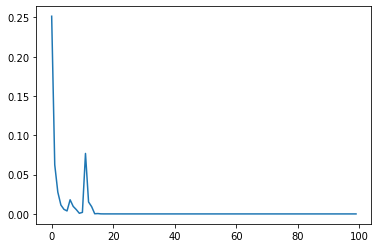

In [869]:
plt.plot(loss_cnn_train)
plt.show()

In [870]:
correct = 0
total = 0
sum_co=[]
with torch.no_grad():
    for i in tqdm(range(len(X_test))):
        #real_class = torch.argmax(Y_test[i])
        real_class = Y_test[i]
        net_out = net(X_test[i].float().view(-1, 1, 23, 23))[0] # returns a list, 
        #print(net_out)
        #predicted = y_pred.ge(.5).view(-1)
        predicted_class = net_out.ge(.5).view(-1)
        #print(predicted_class)
         

        if predicted_class == real_class:
            sum_co.append(predicted_class ==1)
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

100%|██████████| 2784/2784 [00:01<00:00, 2541.86it/s]

Accuracy:  0.995


 # experimenting with a dataset with 50/50 negative/positive samples LR =0.01

In [964]:
loss_cnn_train = []
EPOCHS = 100
BATCH_SIZE = 120
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(X_train), BATCH_SIZE)):
        batch_X = X_train[i:i+BATCH_SIZE].view(-1, 1, 23, 23)
        batch_y = Y_train[i:i+BATCH_SIZE]
        
    
        net.zero_grad()
        outputs = net(batch_X.float())
        #print(outputs)
        loss = loss_function(outputs,  batch_y.float().reshape((-1,1)))
        
        loss.backward()
        optimizer.step()
    loss_cnn_train.append(loss)
    if EPOCHS % 10 == 0:
        print(f"Epoch: {epoch}. Loss: {loss}")

100%|██████████| 20/20 [00:00<00:00, 530.21it/s]


Epoch: 0. Loss: 0.9531942009925842


100%|██████████| 20/20 [00:00<00:00, 572.72it/s]


Epoch: 1. Loss: 0.7327337265014648


100%|██████████| 20/20 [00:00<00:00, 572.16it/s]


Epoch: 2. Loss: 0.6973567605018616


100%|██████████| 20/20 [00:00<00:00, 571.09it/s]


Epoch: 3. Loss: 0.7042765617370605


100%|██████████| 20/20 [00:00<00:00, 573.47it/s]


Epoch: 4. Loss: 0.6948978304862976


100%|██████████| 20/20 [00:00<00:00, 572.48it/s]


Epoch: 5. Loss: 0.6929691433906555


100%|██████████| 20/20 [00:00<00:00, 571.80it/s]


Epoch: 6. Loss: 0.6921002864837646


100%|██████████| 20/20 [00:00<00:00, 571.59it/s]


Epoch: 7. Loss: 0.691900372505188


100%|██████████| 20/20 [00:00<00:00, 571.46it/s]


Epoch: 8. Loss: 0.6919195652008057


100%|██████████| 20/20 [00:00<00:00, 572.59it/s]


Epoch: 9. Loss: 0.6919814348220825


100%|██████████| 20/20 [00:00<00:00, 573.87it/s]


Epoch: 10. Loss: 0.6920611262321472


100%|██████████| 20/20 [00:00<00:00, 573.09it/s]


Epoch: 11. Loss: 0.6921094059944153


100%|██████████| 20/20 [00:00<00:00, 572.82it/s]


Epoch: 12. Loss: 0.6921473145484924


100%|██████████| 20/20 [00:00<00:00, 572.19it/s]


Epoch: 13. Loss: 0.6921945214271545


100%|██████████| 20/20 [00:00<00:00, 568.58it/s]


Epoch: 14. Loss: 0.6922112107276917


100%|██████████| 20/20 [00:00<00:00, 573.36it/s]


Epoch: 15. Loss: 0.6922179460525513


100%|██████████| 20/20 [00:00<00:00, 571.01it/s]


Epoch: 16. Loss: 0.6922386884689331


100%|██████████| 20/20 [00:00<00:00, 575.52it/s]


Epoch: 17. Loss: 0.6922433376312256


100%|██████████| 20/20 [00:00<00:00, 573.11it/s]


Epoch: 18. Loss: 0.6922599077224731


100%|██████████| 20/20 [00:00<00:00, 573.85it/s]


Epoch: 19. Loss: 0.6922681331634521


100%|██████████| 20/20 [00:00<00:00, 571.15it/s]


Epoch: 20. Loss: 0.6922734975814819


100%|██████████| 20/20 [00:00<00:00, 573.05it/s]


Epoch: 21. Loss: 0.6922846436500549


100%|██████████| 20/20 [00:00<00:00, 573.14it/s]


Epoch: 22. Loss: 0.692292332649231


100%|██████████| 20/20 [00:00<00:00, 574.51it/s]


Epoch: 23. Loss: 0.6922932267189026


100%|██████████| 20/20 [00:00<00:00, 574.44it/s]


Epoch: 24. Loss: 0.6922928094863892


100%|██████████| 20/20 [00:00<00:00, 574.02it/s]


Epoch: 25. Loss: 0.6922890543937683


100%|██████████| 20/20 [00:00<00:00, 574.24it/s]


Epoch: 26. Loss: 0.6923051476478577


100%|██████████| 20/20 [00:00<00:00, 574.02it/s]


Epoch: 27. Loss: 0.6922984719276428


100%|██████████| 20/20 [00:00<00:00, 571.70it/s]


Epoch: 28. Loss: 0.6922883987426758


100%|██████████| 20/20 [00:00<00:00, 572.59it/s]


Epoch: 29. Loss: 0.6923074722290039


100%|██████████| 20/20 [00:00<00:00, 573.78it/s]


Epoch: 30. Loss: 0.6923098564147949


100%|██████████| 20/20 [00:00<00:00, 572.64it/s]


Epoch: 31. Loss: 0.692298412322998


100%|██████████| 20/20 [00:00<00:00, 573.62it/s]


Epoch: 32. Loss: 0.692315936088562


100%|██████████| 20/20 [00:00<00:00, 573.41it/s]


Epoch: 33. Loss: 0.6923148036003113


100%|██████████| 20/20 [00:00<00:00, 573.04it/s]


Epoch: 34. Loss: 0.6923197507858276


100%|██████████| 20/20 [00:00<00:00, 572.71it/s]


Epoch: 35. Loss: 0.6923024654388428


100%|██████████| 20/20 [00:00<00:00, 572.41it/s]


Epoch: 36. Loss: 0.6923004388809204


100%|██████████| 20/20 [00:00<00:00, 572.41it/s]


Epoch: 37. Loss: 0.6923109889030457


100%|██████████| 20/20 [00:00<00:00, 572.35it/s]


Epoch: 38. Loss: 0.6923001408576965


100%|██████████| 20/20 [00:00<00:00, 573.78it/s]


Epoch: 39. Loss: 0.6923062801361084


100%|██████████| 20/20 [00:00<00:00, 573.16it/s]


Epoch: 40. Loss: 0.6923195123672485


100%|██████████| 20/20 [00:00<00:00, 571.97it/s]


Epoch: 41. Loss: 0.692304790019989


100%|██████████| 20/20 [00:00<00:00, 570.41it/s]


Epoch: 42. Loss: 0.6923316121101379


100%|██████████| 20/20 [00:00<00:00, 572.90it/s]


Epoch: 43. Loss: 0.6923165321350098


100%|██████████| 20/20 [00:00<00:00, 573.29it/s]


Epoch: 44. Loss: 0.6923221945762634


100%|██████████| 20/20 [00:00<00:00, 573.09it/s]


Epoch: 45. Loss: 0.6923296451568604


100%|██████████| 20/20 [00:00<00:00, 573.35it/s]


Epoch: 46. Loss: 0.692302405834198


100%|██████████| 20/20 [00:00<00:00, 573.33it/s]


Epoch: 47. Loss: 0.6923177242279053


100%|██████████| 20/20 [00:00<00:00, 572.20it/s]


Epoch: 48. Loss: 0.6923306584358215


100%|██████████| 20/20 [00:00<00:00, 572.81it/s]


Epoch: 49. Loss: 0.6923183798789978


100%|██████████| 20/20 [00:00<00:00, 572.82it/s]


Epoch: 50. Loss: 0.6923372745513916


100%|██████████| 20/20 [00:00<00:00, 575.46it/s]


Epoch: 51. Loss: 0.6923526525497437


100%|██████████| 20/20 [00:00<00:00, 574.26it/s]


Epoch: 52. Loss: 0.6923385262489319


100%|██████████| 20/20 [00:00<00:00, 573.70it/s]


Epoch: 53. Loss: 0.6923322677612305


100%|██████████| 20/20 [00:00<00:00, 573.50it/s]


Epoch: 54. Loss: 0.6923235654830933


100%|██████████| 20/20 [00:00<00:00, 574.71it/s]


Epoch: 55. Loss: 0.692335307598114


100%|██████████| 20/20 [00:00<00:00, 573.28it/s]


Epoch: 56. Loss: 0.6923426389694214


100%|██████████| 20/20 [00:00<00:00, 574.06it/s]


Epoch: 57. Loss: 0.6923237442970276


100%|██████████| 20/20 [00:00<00:00, 575.18it/s]


Epoch: 58. Loss: 0.6923303604125977


100%|██████████| 20/20 [00:00<00:00, 573.67it/s]


Epoch: 59. Loss: 0.6923370957374573


100%|██████████| 20/20 [00:00<00:00, 573.66it/s]


Epoch: 60. Loss: 0.6923189163208008


100%|██████████| 20/20 [00:00<00:00, 575.59it/s]


Epoch: 61. Loss: 0.6923186779022217


100%|██████████| 20/20 [00:00<00:00, 575.23it/s]


Epoch: 62. Loss: 0.6923176050186157


100%|██████████| 20/20 [00:00<00:00, 573.30it/s]


Epoch: 63. Loss: 0.6923348903656006


100%|██████████| 20/20 [00:00<00:00, 572.65it/s]


Epoch: 64. Loss: 0.6923232078552246


100%|██████████| 20/20 [00:00<00:00, 573.28it/s]


Epoch: 65. Loss: 0.6923229098320007


100%|██████████| 20/20 [00:00<00:00, 573.53it/s]


Epoch: 66. Loss: 0.6923346519470215


100%|██████████| 20/20 [00:00<00:00, 574.94it/s]


Epoch: 67. Loss: 0.6923115253448486


100%|██████████| 20/20 [00:00<00:00, 574.05it/s]


Epoch: 68. Loss: 0.6923195719718933


100%|██████████| 20/20 [00:00<00:00, 574.07it/s]


Epoch: 69. Loss: 0.692330539226532


100%|██████████| 20/20 [00:00<00:00, 574.43it/s]


Epoch: 70. Loss: 0.6923317909240723


100%|██████████| 20/20 [00:00<00:00, 574.69it/s]


Epoch: 71. Loss: 0.6923061013221741


100%|██████████| 20/20 [00:00<00:00, 573.47it/s]


Epoch: 72. Loss: 0.6923363208770752


100%|██████████| 20/20 [00:00<00:00, 574.91it/s]


Epoch: 73. Loss: 0.6923332214355469


100%|██████████| 20/20 [00:00<00:00, 574.38it/s]


Epoch: 74. Loss: 0.6923413872718811


100%|██████████| 20/20 [00:00<00:00, 572.32it/s]


Epoch: 75. Loss: 0.6923308372497559


100%|██████████| 20/20 [00:00<00:00, 572.09it/s]


Epoch: 76. Loss: 0.6923072934150696


100%|██████████| 20/20 [00:00<00:00, 571.59it/s]


Epoch: 77. Loss: 0.692356288433075


100%|██████████| 20/20 [00:00<00:00, 571.82it/s]


Epoch: 78. Loss: 0.6923334002494812


100%|██████████| 20/20 [00:00<00:00, 572.21it/s]


Epoch: 79. Loss: 0.6923346519470215


100%|██████████| 20/20 [00:00<00:00, 571.85it/s]


Epoch: 80. Loss: 0.6923146843910217


100%|██████████| 20/20 [00:00<00:00, 572.54it/s]


Epoch: 81. Loss: 0.6923403739929199


100%|██████████| 20/20 [00:00<00:00, 570.43it/s]


Epoch: 82. Loss: 0.6923365592956543


100%|██████████| 20/20 [00:00<00:00, 572.39it/s]


Epoch: 83. Loss: 0.6923191547393799


100%|██████████| 20/20 [00:00<00:00, 571.18it/s]


Epoch: 84. Loss: 0.6923238635063171


100%|██████████| 20/20 [00:00<00:00, 574.63it/s]


Epoch: 85. Loss: 0.692334771156311


100%|██████████| 20/20 [00:00<00:00, 572.46it/s]


Epoch: 86. Loss: 0.6923162341117859


100%|██████████| 20/20 [00:00<00:00, 571.75it/s]


Epoch: 87. Loss: 0.6923326253890991


100%|██████████| 20/20 [00:00<00:00, 572.97it/s]


Epoch: 88. Loss: 0.6923163533210754


100%|██████████| 20/20 [00:00<00:00, 572.41it/s]


Epoch: 89. Loss: 0.6923502683639526


100%|██████████| 20/20 [00:00<00:00, 572.68it/s]


Epoch: 90. Loss: 0.6923337578773499


100%|██████████| 20/20 [00:00<00:00, 572.54it/s]


Epoch: 91. Loss: 0.6923301219940186


100%|██████████| 20/20 [00:00<00:00, 576.75it/s]


Epoch: 92. Loss: 0.6923338770866394


100%|██████████| 20/20 [00:00<00:00, 575.03it/s]


Epoch: 93. Loss: 0.6923151016235352


100%|██████████| 20/20 [00:00<00:00, 575.57it/s]


Epoch: 94. Loss: 0.6923325061798096


100%|██████████| 20/20 [00:00<00:00, 573.67it/s]


Epoch: 95. Loss: 0.6923370361328125


100%|██████████| 20/20 [00:00<00:00, 572.64it/s]


Epoch: 96. Loss: 0.6923083066940308


100%|██████████| 20/20 [00:00<00:00, 574.86it/s]


Epoch: 97. Loss: 0.6923229694366455


100%|██████████| 20/20 [00:00<00:00, 576.54it/s]


Epoch: 98. Loss: 0.6923334002494812


100%|██████████| 20/20 [00:00<00:00, 575.69it/s]

Epoch: 99. Loss: 0.6923168301582336


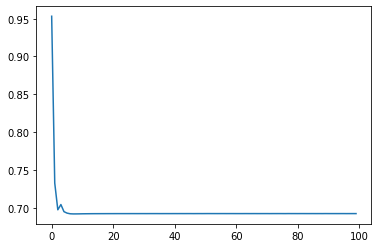

In [965]:
plt.plot(loss_cnn_train)
plt.show()

In [966]:
correct = 0
total = 0
sum_co=[]
with torch.no_grad():
    for i in tqdm(range(len(X_test))):
        #real_class = torch.argmax(Y_test[i])
        real_class = Y_test[i]
        net_out = net(X_test[i].float().view(-1, 1, 23, 23))[0] # returns a list, 
        #print(net_out)
        #predicted = y_pred.ge(.5).view(-1)
        predicted_class = net_out.ge(.5).view(-1)
        #print(predicted_class)
         

        if predicted_class == real_class:
            sum_co.append(predicted_class ==1)
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

100%|██████████| 288/288 [00:00<00:00, 2663.90it/s]

Accuracy:  0.556


 # experimenting with a dataset with 50/50 negative/positive samples LR =0.001

In [970]:
loss_cnn_train = []
EPOCHS = 100
BATCH_SIZE = 120
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(X_train), BATCH_SIZE)):
        batch_X = X_train[i:i+BATCH_SIZE].view(-1, 1, 23, 23)
        batch_y = Y_train[i:i+BATCH_SIZE]
        
    
        net.zero_grad()
        outputs = net(batch_X.float())
        #print(outputs)
        loss = loss_function(outputs,  batch_y.float().reshape((-1,1)))
        
        loss.backward()
        optimizer.step()
    loss_cnn_train.append(loss)
    if EPOCHS % 10 == 0:
        print(f"Epoch: {epoch}. Loss: {loss}")

100%|██████████| 20/20 [00:00<00:00, 506.48it/s]


Epoch: 0. Loss: 0.6923124194145203


100%|██████████| 20/20 [00:00<00:00, 574.81it/s]


Epoch: 1. Loss: 0.6910194158554077


100%|██████████| 20/20 [00:00<00:00, 572.85it/s]


Epoch: 2. Loss: 0.6880052089691162


100%|██████████| 20/20 [00:00<00:00, 574.07it/s]


Epoch: 3. Loss: 0.6669464707374573


100%|██████████| 20/20 [00:00<00:00, 574.74it/s]


Epoch: 4. Loss: 0.4051553010940552


100%|██████████| 20/20 [00:00<00:00, 573.75it/s]


Epoch: 5. Loss: 0.14059892296791077


100%|██████████| 20/20 [00:00<00:00, 573.12it/s]


Epoch: 6. Loss: 0.09418408572673798


100%|██████████| 20/20 [00:00<00:00, 573.47it/s]


Epoch: 7. Loss: 0.07919937372207642


100%|██████████| 20/20 [00:00<00:00, 572.93it/s]


Epoch: 8. Loss: 0.06491606682538986


100%|██████████| 20/20 [00:00<00:00, 573.99it/s]


Epoch: 9. Loss: 0.05850929766893387


100%|██████████| 20/20 [00:00<00:00, 573.74it/s]


Epoch: 10. Loss: 0.030783556401729584


100%|██████████| 20/20 [00:00<00:00, 574.72it/s]


Epoch: 11. Loss: 0.013002465479075909


100%|██████████| 20/20 [00:00<00:00, 573.97it/s]


Epoch: 12. Loss: 0.009713002480566502


100%|██████████| 20/20 [00:00<00:00, 573.24it/s]


Epoch: 13. Loss: 0.0071041882038116455


100%|██████████| 20/20 [00:00<00:00, 573.14it/s]


Epoch: 14. Loss: 0.006240298505872488


100%|██████████| 20/20 [00:00<00:00, 573.83it/s]


Epoch: 15. Loss: 0.019640959799289703


100%|██████████| 20/20 [00:00<00:00, 573.34it/s]


Epoch: 16. Loss: 0.002272837795317173


100%|██████████| 20/20 [00:00<00:00, 573.31it/s]


Epoch: 17. Loss: 0.009043497033417225


100%|██████████| 20/20 [00:00<00:00, 574.16it/s]


Epoch: 18. Loss: 0.0032102291006594896


100%|██████████| 20/20 [00:00<00:00, 573.80it/s]


Epoch: 19. Loss: 0.010761911980807781


100%|██████████| 20/20 [00:00<00:00, 574.17it/s]


Epoch: 20. Loss: 0.007366305682808161


100%|██████████| 20/20 [00:00<00:00, 573.83it/s]


Epoch: 21. Loss: 0.015747275203466415


100%|██████████| 20/20 [00:00<00:00, 573.07it/s]


Epoch: 22. Loss: 0.012900721281766891


100%|██████████| 20/20 [00:00<00:00, 572.93it/s]


Epoch: 23. Loss: 0.02979191392660141


100%|██████████| 20/20 [00:00<00:00, 572.86it/s]


Epoch: 24. Loss: 0.07650205492973328


100%|██████████| 20/20 [00:00<00:00, 573.04it/s]


Epoch: 25. Loss: 0.015832167118787766


100%|██████████| 20/20 [00:00<00:00, 572.70it/s]


Epoch: 26. Loss: 0.0002557483094278723


100%|██████████| 20/20 [00:00<00:00, 573.46it/s]


Epoch: 27. Loss: 0.0002687991946004331


100%|██████████| 20/20 [00:00<00:00, 573.45it/s]


Epoch: 28. Loss: 0.0004958664067089558


100%|██████████| 20/20 [00:00<00:00, 571.63it/s]


Epoch: 29. Loss: 0.0002164817851735279


100%|██████████| 20/20 [00:00<00:00, 571.94it/s]


Epoch: 30. Loss: 0.00010161061800317839


100%|██████████| 20/20 [00:00<00:00, 575.02it/s]


Epoch: 31. Loss: 9.077305003302172e-05


100%|██████████| 20/20 [00:00<00:00, 574.27it/s]


Epoch: 32. Loss: 9.14001720957458e-05


100%|██████████| 20/20 [00:00<00:00, 575.50it/s]


Epoch: 33. Loss: 8.3087885286659e-05


100%|██████████| 20/20 [00:00<00:00, 575.06it/s]


Epoch: 34. Loss: 7.814089622115716e-05


100%|██████████| 20/20 [00:00<00:00, 575.43it/s]


Epoch: 35. Loss: 7.428341632476076e-05


100%|██████████| 20/20 [00:00<00:00, 574.72it/s]


Epoch: 36. Loss: 7.056711910990998e-05


100%|██████████| 20/20 [00:00<00:00, 576.54it/s]


Epoch: 37. Loss: 6.723415572196245e-05


100%|██████████| 20/20 [00:00<00:00, 577.62it/s]


Epoch: 38. Loss: 6.416269025066867e-05


100%|██████████| 20/20 [00:00<00:00, 577.05it/s]


Epoch: 39. Loss: 6.135024887043983e-05


100%|██████████| 20/20 [00:00<00:00, 576.66it/s]


Epoch: 40. Loss: 5.885396967642009e-05


100%|██████████| 20/20 [00:00<00:00, 576.52it/s]


Epoch: 41. Loss: 5.642233372782357e-05


100%|██████████| 20/20 [00:00<00:00, 574.02it/s]


Epoch: 42. Loss: 5.4231251851888373e-05


100%|██████████| 20/20 [00:00<00:00, 575.03it/s]


Epoch: 43. Loss: 5.215502096689306e-05


100%|██████████| 20/20 [00:00<00:00, 573.26it/s]


Epoch: 44. Loss: 5.020255412091501e-05


100%|██████████| 20/20 [00:00<00:00, 571.51it/s]


Epoch: 45. Loss: 4.8393732868134975e-05


100%|██████████| 20/20 [00:00<00:00, 576.47it/s]


Epoch: 46. Loss: 4.673399598686956e-05


100%|██████████| 20/20 [00:00<00:00, 577.04it/s]


Epoch: 47. Loss: 4.510956568992697e-05


100%|██████████| 20/20 [00:00<00:00, 576.10it/s]


Epoch: 48. Loss: 4.3605898099485785e-05


100%|██████████| 20/20 [00:00<00:00, 575.35it/s]


Epoch: 49. Loss: 4.221703056828119e-05


100%|██████████| 20/20 [00:00<00:00, 577.25it/s]


Epoch: 50. Loss: 4.085947512066923e-05


100%|██████████| 20/20 [00:00<00:00, 577.05it/s]


Epoch: 51. Loss: 3.962072150898166e-05


100%|██████████| 20/20 [00:00<00:00, 578.55it/s]


Epoch: 52. Loss: 3.839436612906866e-05


100%|██████████| 20/20 [00:00<00:00, 575.01it/s]


Epoch: 53. Loss: 3.7219710065983236e-05


100%|██████████| 20/20 [00:00<00:00, 577.76it/s]


Epoch: 54. Loss: 3.615985770011321e-05


100%|██████████| 20/20 [00:00<00:00, 578.11it/s]


Epoch: 55. Loss: 3.510794340400025e-05


100%|██████████| 20/20 [00:00<00:00, 575.76it/s]


Epoch: 56. Loss: 3.4057033190038055e-05


100%|██████████| 20/20 [00:00<00:00, 575.03it/s]


Epoch: 57. Loss: 3.313284832984209e-05


100%|██████████| 20/20 [00:00<00:00, 576.36it/s]


Epoch: 58. Loss: 3.217488119844347e-05


100%|██████████| 20/20 [00:00<00:00, 575.95it/s]


Epoch: 59. Loss: 3.127504896838218e-05


100%|██████████| 20/20 [00:00<00:00, 575.44it/s]


Epoch: 60. Loss: 3.042689604626503e-05


100%|██████████| 20/20 [00:00<00:00, 579.54it/s]


Epoch: 61. Loss: 2.963539918710012e-05


100%|██████████| 20/20 [00:00<00:00, 577.91it/s]


Epoch: 62. Loss: 2.879072962969076e-05


100%|██████████| 20/20 [00:00<00:00, 577.72it/s]


Epoch: 63. Loss: 2.8044452847098e-05


100%|██████████| 20/20 [00:00<00:00, 577.48it/s]


Epoch: 64. Loss: 2.7314070393913426e-05


100%|██████████| 20/20 [00:00<00:00, 577.54it/s]


Epoch: 65. Loss: 2.6617988623911515e-05


100%|██████████| 20/20 [00:00<00:00, 575.41it/s]


Epoch: 66. Loss: 2.5889605240081437e-05


100%|██████████| 20/20 [00:00<00:00, 574.68it/s]


Epoch: 67. Loss: 2.5215376808773726e-05


100%|██████████| 20/20 [00:00<00:00, 575.47it/s]


Epoch: 68. Loss: 2.458687777107116e-05


100%|██████████| 20/20 [00:00<00:00, 572.27it/s]


Epoch: 69. Loss: 2.3973776478669606e-05


100%|██████████| 20/20 [00:00<00:00, 571.48it/s]


Epoch: 70. Loss: 2.3387021428789012e-05


100%|██████████| 20/20 [00:00<00:00, 574.28it/s]


Epoch: 71. Loss: 2.2786833142163232e-05


100%|██████████| 20/20 [00:00<00:00, 574.73it/s]


Epoch: 72. Loss: 2.2283062207861803e-05


100%|██████████| 20/20 [00:00<00:00, 575.29it/s]


Epoch: 73. Loss: 2.1727104467572644e-05


100%|██████████| 20/20 [00:00<00:00, 574.87it/s]


Epoch: 74. Loss: 2.121885154338088e-05


100%|██████████| 20/20 [00:00<00:00, 575.69it/s]


Epoch: 75. Loss: 2.0717061488539912e-05


100%|██████████| 20/20 [00:00<00:00, 576.20it/s]


Epoch: 76. Loss: 2.025650792347733e-05


100%|██████████| 20/20 [00:00<00:00, 575.62it/s]


Epoch: 77. Loss: 1.9794972104136832e-05


100%|██████████| 20/20 [00:00<00:00, 575.24it/s]


Epoch: 78. Loss: 1.9342860468896106e-05


100%|██████████| 20/20 [00:00<00:00, 572.68it/s]


Epoch: 79. Loss: 1.8881319192587398e-05


100%|██████████| 20/20 [00:00<00:00, 573.59it/s]


Epoch: 80. Loss: 1.8455555618857034e-05


100%|██████████| 20/20 [00:00<00:00, 572.62it/s]


Epoch: 81. Loss: 1.800941572582815e-05


100%|██████████| 20/20 [00:00<00:00, 572.64it/s]


Epoch: 82. Loss: 1.7639793441048823e-05


100%|██████████| 20/20 [00:00<00:00, 570.58it/s]


Epoch: 83. Loss: 1.7266695067519322e-05


100%|██████████| 20/20 [00:00<00:00, 576.45it/s]


Epoch: 84. Loss: 1.6842919649207033e-05


100%|██████████| 20/20 [00:00<00:00, 574.61it/s]


Epoch: 85. Loss: 1.647677709115669e-05


100%|██████████| 20/20 [00:00<00:00, 575.16it/s]


Epoch: 86. Loss: 1.614690336282365e-05


100%|██████████| 20/20 [00:00<00:00, 574.10it/s]


Epoch: 87. Loss: 1.581951801199466e-05


100%|██████████| 20/20 [00:00<00:00, 574.27it/s]


Epoch: 88. Loss: 1.5471759979845956e-05


100%|██████████| 20/20 [00:00<00:00, 574.20it/s]


Epoch: 89. Loss: 1.516871816420462e-05


100%|██████████| 20/20 [00:00<00:00, 574.59it/s]


Epoch: 90. Loss: 1.4860707779007498e-05


100%|██████████| 20/20 [00:00<00:00, 572.80it/s]


Epoch: 91. Loss: 1.4543755241902545e-05


100%|██████████| 20/20 [00:00<00:00, 574.04it/s]


Epoch: 92. Loss: 1.4235743947210722e-05


100%|██████████| 20/20 [00:00<00:00, 575.89it/s]


Epoch: 93. Loss: 1.3972947272122838e-05


100%|██████████| 20/20 [00:00<00:00, 575.46it/s]


Epoch: 94. Loss: 1.3674380170414224e-05


100%|██████████| 20/20 [00:00<00:00, 574.31it/s]


Epoch: 95. Loss: 1.3415555258688983e-05


100%|██████████| 20/20 [00:00<00:00, 572.46it/s]


Epoch: 96. Loss: 1.3148288417141885e-05


100%|██████████| 20/20 [00:00<00:00, 576.36it/s]


Epoch: 97. Loss: 1.2888471246697009e-05


100%|██████████| 20/20 [00:00<00:00, 575.56it/s]


Epoch: 98. Loss: 1.2639087799470872e-05


100%|██████████| 20/20 [00:00<00:00, 575.07it/s]

Epoch: 99. Loss: 1.2383247849356849e-05


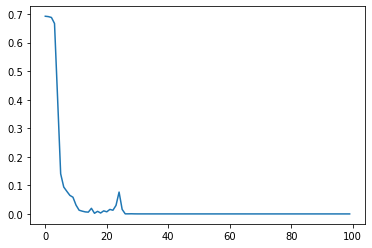

In [971]:
plt.plot(loss_cnn_train)
plt.show()

In [972]:
correct = 0
total = 0
sum_co=[]
with torch.no_grad():
    for i in tqdm(range(len(X_test))):
        #real_class = torch.argmax(Y_test[i])
        real_class = Y_test[i]
        net_out = net(X_test[i].float().view(-1, 1, 23, 23))[0] # returns a list, 
        #print(net_out)
        #predicted = y_pred.ge(.5).view(-1)
        predicted_class = net_out.ge(.5).view(-1)
        #print(predicted_class)
         

        if predicted_class == real_class:
            sum_co.append(predicted_class ==1)
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

100%|██████████| 288/288 [00:00<00:00, 2631.75it/s]

Accuracy:  0.972


In [592]:
x_flat = torch.randn(100, 529)
X_train_cnn = torch.tensor(X_train)

In [593]:
x_reshaped = X_train_cnn.view(-1, 1, 23, 23)

In [594]:
x_reshaped.shape

torch.Size([12000, 1, 23, 23])

In [587]:
X_train[0, :].shape

torch.Size([528])

In [632]:
X_test.shape

torch.Size([2784, 23, 23])